In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"61868d42-ad8c-46db-9f41-c8d4d46eebf3\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Long Only Report (Old)\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:


pip install QuantStats

  Obtaining dependency information for QuantStats from https://files.pythonhosted.org/packages/bc/02/306226b38cc51972853f56866a566f224cf3855d1e3b492a774fb00c71a5/QuantStats-0.0.62-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 10.9 MB/s eta 0:00:00
DEPRECATION: dropbox 11.25.0 has a non-standard dependency specifier stone>=2.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of dropbox or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"plt\",\"mtick\",\"sns\",\"np\",\"norm\",\"qs\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
from scipy.stats import norm
import quantstats as qs

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"file_path\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# specify the file path
file_path = 'SPY-1HR.xlsx'

# read in the 'Trades List' sheet
df = pd.read_excel(file_path, sheet_name='Trades List')

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['#', 'Type', 'Date/Time', 'Profit/Loss']]

#Add a new column called 'Exit Date/Time' with the same data as 'Date/Time'
df['Exit Date/Time'] = df['Date/Time']

# Shift the contents of the 'Exit Date/Time' column up one row
df['Exit Date/Time'] = df['Exit Date/Time'].shift(-1)

# Shift the contents of the 'Profit/Loss' column up one row
df['Profit/Loss'] = df['Profit/Loss'].shift(-1)

# Drop all rows where there is a NaN in the '#' column
df = df.dropna(subset=['#'])

#Remove Short Trades
df = df[df['Type'] !='Sell Short']

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date', inplace=True)

df.head()

# 
 Type 
 Date/Time 
 Profit/Loss 
 Exit Date/Time 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 2009-02-27 12:00:00 
 1.0 
 Buy 
 2009-02-27 12:00:00 
 -13.24 
 2009-03-02 09:00:00 
 
 
 2009-03-03 08:00:00 
 2.0 
 Buy 
 2009-03-03 08:00:00 
 4.72 
 2009-03-11 13:00:00 
 
 
 2009-03-12 12:00:00 
 3.0 
 Buy 
 2009-03-12 12:00:00 
 3.80 
 2009-03-13 11:00:00 
 
 
 2009-03-16 10:00:00 
 4.0 
 Buy 
 2009-03-16 10:00:00 
 13.20 
 2009-03-18 13:00:00 
 
 
 2009-03-19 11:00:00 
 5.0 
 Buy 
 2009-03-19 11:00:00 
 8.20 
 2009-03-24 09:00:00

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\",\"pd\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))


# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit/Loss'] = pd.to_numeric(df['Profit/Loss'], errors='coerce')

df['CumPL'] = 400 + df['Profit/Loss'].cumsum()

# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit/Loss'] = pd.to_numeric(df['Profit/Loss'], errors='coerce')
df['CumPL'] = pd.to_numeric(df['CumPL'], errors='coerce')

#Create a new column called 'returnPerc'
df['returnPerc'] = df['CumPL'].pct_change()
# Set the first value of 'returnPerc' to 0
df.at[df.index[0], 'returnPerc'] = -0.002


df.head()

# 
 Type 
 Date/Time 
 Profit/Loss 
 Exit Date/Time 
 CumPL 
 returnPerc 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 2009-02-27 12:00:00 
 1.0 
 Buy 
 2009-02-27 12:00:00 
 -13.24 
 2009-03-02 09:00:00 
 386.76 
 -0.002000 
 
 
 2009-03-03 08:00:00 
 2.0 
 Buy 
 2009-03-03 08:00:00 
 4.72 
 2009-03-11 13:00:00 
 391.48 
 0.012204 
 
 
 2009-03-12 12:00:00 
 3.0 
 Buy 
 2009-03-12 12:00:00 
 3.80 
 2009-03-13 11:00:00 
 395.28 
 0.009707 
 
 
 2009-03-16 10:00:00 
 4.0 
 Buy 
 2009-03-16 10:00:00 
 13.20 
 2009-03-18 13:00:00 
 408.48 
 0.033394 
 
 
 2009-03-19 11:00:00 
 5.0 
 Buy 
 2009-03-19 11:00:00 
 8.20 
 2009-03-24 09:00:00 
 416.68 
 0.020074

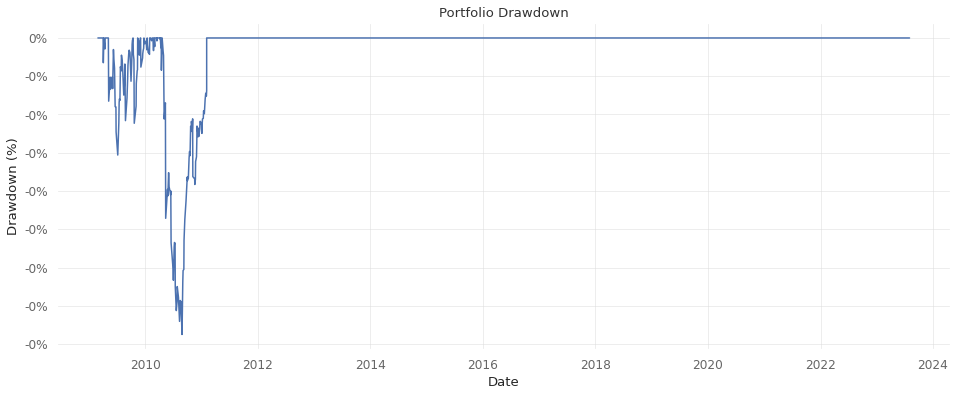

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"cum_max_equity\",\"drawdown\",\"fmt\",\"yticks\",\"df\",\"plt\",\"mtick\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the maximum equity up to each date
cum_max_equity = df['CumPL'].cummax()

# Calculate the drawdown as a percentage from the maximum equity
drawdown = (df['CumPL'] - cum_max_equity) / cum_max_equity

# Set the figure size
plt.figure(figsize=(16,6))

# Plot the drawdown
plt.plot(drawdown)
plt.title('Portfolio Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')

# Format y-axis as percentage
fmt = '%.0f%%' 
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

plt.show()

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"cumulative_return\",\"drawdown\",\"average_drawdown\",\"drawdown_duration\",\"recovery_factor\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Calculate the average drawdown
average_drawdown = -1 * drawdown.mean()

# Calculate the average drawdown time in days
drawdown_duration = drawdown[drawdown > 0].index.to_series().diff().mean().days

# Calculate the recovery factor
recovery_factor = -1 * cumulative_return.min() / average_drawdown

# Print the portfolio statistics

print(f"Average drawdown: {average_drawdown:.2%}")
print(f"Average drawdown duration: {drawdown_duration} days")
print(f"Recovery factor: {recovery_factor:.2f}")

Average drawdown: -0.50%
Average drawdown duration: 4 days
Recovery factor: 200.56


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"total_return\",\"num_years\",\"cagr\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the total return of the portfolio
total_return = df['CumPL'][-1] / df['CumPL'][0] - 1

# Calculate the number of years that the portfolio has been invested
num_years = (df.index[-1] - df.index[0]).days / 365.25

# Calculate the CAGR
cagr = (1 + total_return)**(1/num_years) - 1

print('CAGR: {:.2%}'.format(cagr))

CAGR: nan%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"monthly_returns\",\"monthly_returns_df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Display the monthly returns as a DataFrame
monthly_returns_df = pd.DataFrame({'Monthly Return': monthly_returns * 100})
print(monthly_returns_df.tail(50))

            Monthly Return
Date                      
2019-07-31        2.506085
2019-08-31        2.023045
2019-09-30        2.240441
2019-10-31        2.471845
2019-11-30        2.020718
2019-12-31        2.047682
2020-01-31        2.055735
2020-02-29        1.803189
2020-03-31        1.185506
2020-04-30        2.461179
2020-05-31        2.659306
2020-06-30        2.637451
2020-07-31        2.637284
2020-08-31        3.427066
2020-09-30        2.180037
2020-10-31        2.530079
2020-11-30        2.676787
2020-12-31        3.329678
2021-01-31        2.095951
2021-02-28        2.109594
2021-03-31        2.998942
2021-04-30        2.700717
2021-05-31        2.630548
2021-06-30        3.138747
2021-07-31        3.041740
2021-08-31        2.435861
2021-09-30        1.308276
2021-10-31        2.620572
2021-11-30        2.316369
2021-12-31        2.552172
2022-01-31        1.248430
2022-02-28        2.049726
2022-03-31        2.816099
2022-04-30        1.468102
2022-05-31        1.819350
2

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"yearly_returns\",\"yearly_returns_df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the yearly returns
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Display the yearly returns as a DataFrame
yearly_returns_df = pd.DataFrame({'Yearly Return': yearly_returns * 100})
print(yearly_returns_df.head(20))

            Yearly Return
Date                     
2009-12-31            NaN
2010-12-31       4.285362
2011-12-31    1905.416043
2012-12-31     116.687472
2013-12-31      98.435165
2014-12-31      73.235857
2015-12-31      43.550799
2016-12-31      39.521005
2017-12-31      32.673130
2018-12-31      29.988997
2019-12-31      29.898620
2020-12-31      33.916685
2021-12-31      34.404669
2022-12-31      22.259865
2023-12-31      16.233396


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"monthly_returns\",\"best_month\",\"best_month_return\",\"worst_month\",\"worst_month_return\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Find the best and worst performing months
best_month = monthly_returns.idxmax().strftime('%B %Y')
best_month_return = monthly_returns.max() * 100
worst_month = monthly_returns.idxmin().strftime('%B %Y')
worst_month_return = monthly_returns.min() * 100

# Display the results
print(f"Best performing month: {best_month}, Return: {best_month_return:.2f}%")
print(f"Worst performing month: {worst_month}, Return: {worst_month_return:.2f}%")

Best performing month: February 2011, Return: 213.55%
Worst performing month: May 2010, Return: -7.40%


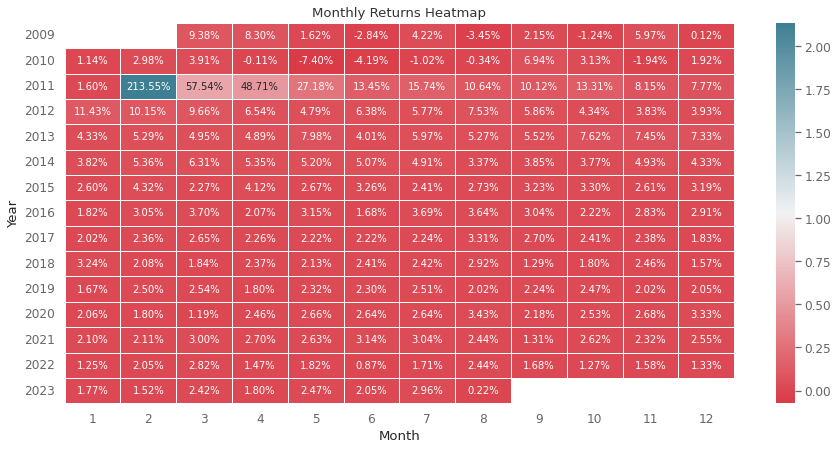

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"monthly_returns\",\"monthly_returns_pivot\",\"fig\",\"ax\",\"cmap\",\"df\",\"plt\",\"sns\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Create a pivot table of monthly returns
monthly_returns_pivot = monthly_returns.reset_index().pivot_table(index=monthly_returns.index.year, columns=monthly_returns.index.month, values='CumPL')

# Create heatmap
fig, ax = plt.subplots(figsize=(15,7))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(monthly_returns_pivot, annot=True, fmt=".2%", linewidths=0.5, ax=ax, cmap=cmap)
plt.title('Monthly Returns Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"yearly_returns\",\"best_years\",\"worst_years\",\"year\",\"return_\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate yearly returns
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Find the best and worst performing years
best_years = yearly_returns.sort_values(ascending=False).head(3)
worst_years = yearly_returns.sort_values().head(3)

# Display the results
print("Best performing years:")
for year, return_ in best_years.items():
    print(f"- Year: {year.year}, Return: {return_*100:.2f}%")

print("\nWorst performing years:")
for year, return_ in worst_years.items():
    print(f"- Year: {year.year}, Return: {return_*100:.2f}%")

Best performing years:
- Year: 2011, Return: 1905.42%
- Year: 2012, Return: 116.69%
- Year: 2013, Return: 98.44%

Worst performing years:
- Year: 2010, Return: 4.29%
- Year: 2023, Return: 16.23%
- Year: 2022, Return: 22.26%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"monthly_returns\",\"quarterly_returns\",\"yearly_returns\",\"positive_months\",\"positive_quarters\",\"positive_years\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate monthly, quarterly, and yearly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()
quarterly_returns = df['CumPL'].resample('Q').last().pct_change()
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Calculate percentage of positive months, quarters, and years
positive_months = (monthly_returns > 0).mean() * 100
positive_quarters = (quarterly_returns > 0).mean() * 100
positive_years = (yearly_returns > 0).mean() * 100

#Display the results
print(f"Percentage of positive months: {positive_months:.2f}%")
print(f"Percentage of positive quarters: {positive_quarters:.2f}%")
print(f"Percentage of positive years: {positive_years:.2f}%")

Percentage of positive months: 94.29%
Percentage of positive quarters: 96.61%
Percentage of positive years: 93.33%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\",\"top_10_drawdowns\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

df = df.reset_index()

# calculate the drawdowns
df['peak'] = df['CumPL'].cummax()
df['drawdown'] = df['CumPL'] - df['peak']
df['drawdown_pct'] = df['drawdown'] / df['peak'] * 100

# get the top 10 drawdowns
top_10_drawdowns = df.sort_values('drawdown_pct').head(10)[['Date', 'drawdown_pct']]

# rename columns
top_10_drawdowns = top_10_drawdowns.rename(columns={'Date': 'Start Date', 'drawdown_pct': 'Drawdown (%)'})

# reset index
top_10_drawdowns = top_10_drawdowns.reset_index(drop=True)

# display the table
print(top_10_drawdowns[['Start Date', 'Drawdown (%)']])

           Start Date  Drawdown (%)
0 2010-08-27 13:00:00    -15.500376
1 2010-08-26 10:00:00    -15.237020
2 2010-08-11 08:00:00    -14.815651
3 2010-08-23 14:00:00    -14.635064
4 2010-07-21 08:00:00    -14.251317
5 2010-08-19 09:00:00    -14.161023
6 2010-07-22 12:00:00    -14.138450
7 2010-08-20 11:00:00    -13.777276
8 2010-07-26 09:00:00    -13.777276
9 2010-08-16 08:00:00    -13.724605


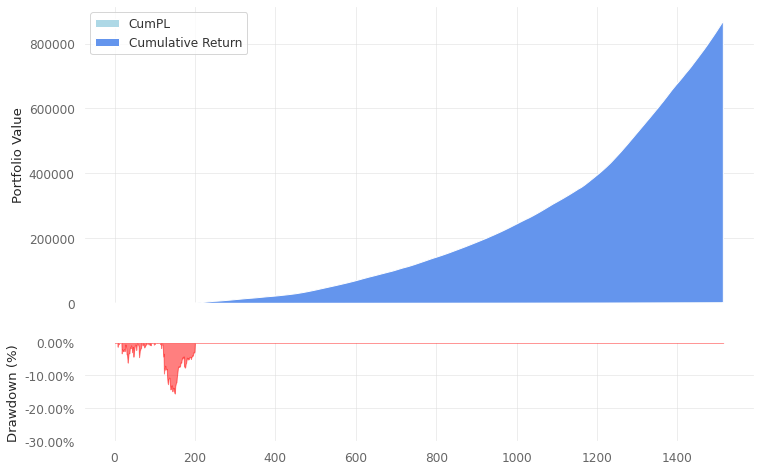

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"cumulative_return\",\"drawdown\",\"fig\",\"ax\",\"df\",\"plt\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Invert the drawdown so it shows a negative number
drawdown = -1 * drawdown

# Create a stacked line plot with drawdown plot beneath it
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].stackplot(df.index, df['CumPL'], cumulative_return-df['CumPL'], labels=['CumPL', 'Cumulative Return'], colors=['lightblue', 'cornflowerblue'])
ax[1].fill_between(df.index, drawdown, 0, color='red', alpha=0.5)
ax[1].set_ylim(-0.3, 0)
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Portfolio Value')
ax[1].set_ylabel('Drawdown (%)')
ax[1].yaxis.set_major_formatter('{x:.2%}')
plt.show()

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"daily_returns\",\"cumulative_return\",\"average_daily_return\",\"std_daily_return\",\"annualized_volatility\",\"sharpe_ratio\",\"sortino_ratio\",\"var_95\",\"daily_var_95\",\"average_monthly_return\",\"df\",\"np\",\"norm\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# calculate daily returns
daily_returns = df['CumPL'].pct_change()

# calculate portfolio statistics
cumulative_return = (df['CumPL'].iloc[-1] / df['CumPL'].iloc[0]) - 1
average_daily_return = daily_returns.mean()
std_daily_return = daily_returns.std()
annualized_volatility = std_daily_return * np.sqrt(252)
sharpe_ratio = np.sqrt(252) * (average_daily_return / std_daily_return)
sortino_ratio = np.sqrt(252) * (average_daily_return / daily_returns[daily_returns < 0].std())
var_95 = norm.ppf(0.05, average_daily_return, std_daily_return) * df['CumPL'].iloc[-1]
daily_var_95 = -var_95 / len(df.index)
average_monthly_return = ((1 + cumulative_return) ** (1 / len(df.index)) - 1) * 100



# display portfolio statistics
print(f"Cumulative return: {cumulative_return.item():.2%}")
print(f"Average daily return: {average_daily_return.item():.2%}")
print(f"Daily return volatility: {std_daily_return.item():.2%}")
print(f"Annualized volatility: {annualized_volatility.item():.2%}")
print(f"Sharpe ratio: {sharpe_ratio.item():.2f}")
print(f"Sortino ratio: {sortino_ratio.item():.2f}")
print(f"95% VaR (1 day): {var_95.item():.2f}")
print(f"Daily VaR (95%, 1 day): {daily_var_95.item():.2f}")
print(f"Average monthly return: {average_monthly_return:.2f}%")

Cumulative return: nan%
Average daily return: 0.52%
Daily return volatility: 1.31%
Annualized volatility: 20.83%
Sharpe ratio: 6.28
Sortino ratio: 7.61
95% VaR (1 day): nan
Daily VaR (95%, 1 day): nan
Average monthly return: nan%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

df.head()

Date 
 # 
 Type 
 Date/Time 
 Profit/Loss 
 Exit Date/Time 
 CumPL 
 returnPerc 
 peak 
 drawdown 
 drawdown_pct 
 
 
 
 
 0 
 2009-02-27 12:00:00 
 1.0 
 Buy 
 2009-02-27 12:00:00 
 -13.24 
 2009-03-02 09:00:00 
 386.76 
 -0.002000 
 386.76 
 0.0 
 0.0 
 
 
 1 
 2009-03-03 08:00:00 
 2.0 
 Buy 
 2009-03-03 08:00:00 
 4.72 
 2009-03-11 13:00:00 
 391.48 
 0.012204 
 391.48 
 0.0 
 0.0 
 
 
 2 
 2009-03-12 12:00:00 
 3.0 
 Buy 
 2009-03-12 12:00:00 
 3.80 
 2009-03-13 11:00:00 
 395.28 
 0.009707 
 395.28 
 0.0 
 0.0 
 
 
 3 
 2009-03-16 10:00:00 
 4.0 
 Buy 
 2009-03-16 10:00:00 
 13.20 
 2009-03-18 13:00:00 
 408.48 
 0.033394 
 408.48 
 0.0 
 0.0 
 
 
 4 
 2009-03-19 11:00:00 
 5.0 
 Buy 
 2009-03-19 11:00:00 
 8.20 
 2009-03-24 09:00:00 
 416.68 
 0.020074 
 416.68 
 0.0 
 0.0

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['Date/Time', 'returnPerc']]

# Convert the date/time column to a pandas datetime object
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Rename the date/time column to just 'date'
df = df.rename(columns={'Date/Time': 'Date'})

# Set the date column as the index
df.set_index('Date', inplace=True)

df.index = pd.to_datetime(df.index, utc=True).tz_localize(None)

df.head(40)

returnPerc 
 
 
 Date 
 
 
 
 
 
 2009-02-27 12:00:00 
 -0.002000 
 
 
 2009-03-03 08:00:00 
 0.012204 
 
 
 2009-03-12 12:00:00 
 0.009707 
 
 
 2009-03-16 10:00:00 
 0.033394 
 
 
 2009-03-19 11:00:00 
 0.020074 
 
 
 2009-03-25 09:00:00 
 0.002016 
 
 
 2009-03-30 10:00:00 
 0.013221 
 
 
 2009-04-02 08:00:00 
 0.000378 
 
 
 2009-04-03 14:00:00 
 -0.012949 
 
 
 2009-04-07 11:00:00 
 0.033515 
 
 
 2009-04-14 08:00:00 
 -0.005744 
 
 
 2009-04-15 12:00:00 
 0.010437 
 
 
 2009-04-17 08:00:00 
 0.004796 
 
 
 2009-04-21 10:00:00 
 0.012024 
 
 
 2009-04-22 14:00:00 
 0.014965 
 
 
 2009-04-27 14:00:00 
 0.023501 
 
 
 2009-05-01 14:00:00 
 0.026716 
 
 
 2009-05-06 09:00:00 
 0.011395 
 
 
 2009-05-08 11:00:00 
 -0.033042 
 
 
 2009-05-18 10:00:00 
 0.012955 
 
 
 2009-05-20 08:00:00 
 -0.006352 
 
 
 2009-05-22 08:00:00 
 0.000518 
 
 
 2009-05-26 13:00:00 
 0.001381 
 
 
 2009-05-28 12:00:00 
 0.003621 
 
 
 2009-06-01 10:00:00 
 0.001031 
 
 
 2009-06-03 08:00:00 
 -0.006265 
 
 
 2009-06-04 11:00:00 
 0.005959 
 
 
 2009-06-08 08:00:00 
 0.014938 
 
 
 2009-06-11 10:00:00 
 -0.005244 
 
 
 2009-06-15 09:00:00 
 -0.004507 
 
 
 2009-06-19 11:00:00 
 -0.020501 
 
 
 2009-06-24 12:00:00 
 -0.000174 
 
 
 2009-06-25 14:00:00 
 -0.013519 
 
 
 2009-07-06 08:00:00 
 -0.012732 
 
 
 2009-07-13 08:00:00 
 0.017912 
 
 
 2009-07-15 08:00:00 
 0.011174 
 
 
 2009-07-17 08:00:00 
 0.001914 
 
 
 2009-07-20 12:00:00 
 -0.000782 
 
 
 2009-07-22 10:00:00 
 0.014167 
 
 
 2009-07-23 13:00:00 
 0.003942

Performance Metrics

                           Strategy
-------------------------  -----------
Start Period               2009-02-27
End Period                 2023-08-03
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          224,677.69%
CAGR﹪                     44.65%

Sharpe                     6.28
Prob. Sharpe Ratio         100.0%
Smart Sharpe               2.14
Sortino                    26.91
Smart Sortino              9.18
Sortino/√2                 19.03
Smart Sortino/√2           6.49
Omega                      13.19

Max Drawdown               -15.5%
Longest DD Days            283
Volatility (ann.)          20.83%
Calmar                     2.88
Skew                       8.74
Kurtosis                   111.43

Expected Daily %           0.51%
Expected Monthly %         4.51%
Expected Yearly %          67.28%
Kelly Criterion            87.78%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.64%
Expected Shortfall (cVaR)  -1.64%

Max Consecutiv

None

Worst 5 Drawdowns

Start 
 Valley 
 End 
 Days 
 Max Drawdown 
 99% Max Drawdown 
 
 
 
 
 1 
 2010-04-26 
 2010-08-27 
 2011-02-03 
 283 
 -15.500376 
 -15.237020 
 
 
 2 
 2009-05-08 
 2009-07-06 
 2009-10-09 
 155 
 -6.120733 
 -4.910039 
 
 
 3 
 2009-10-15 
 2009-10-21 
 2009-11-11 
 27 
 -4.460348 
 -3.561621 
 
 
 4 
 2010-04-15 
 2010-04-15 
 2010-04-19 
 4 
 -1.686200 
 -0.310019 
 
 
 5 
 2009-12-03 
 2009-12-03 
 2009-12-21 
 19 
 -1.523342 
 -1.212121

Strategy Visualization

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


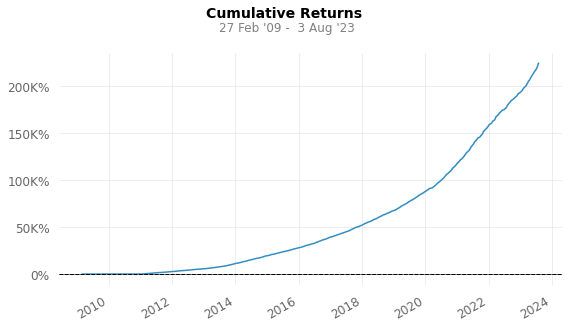

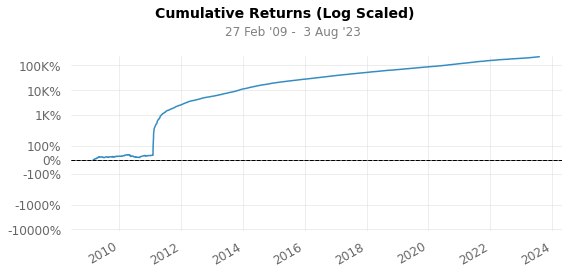

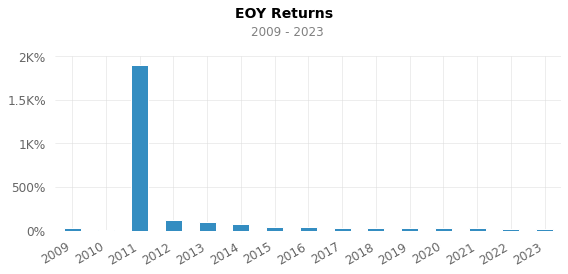

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


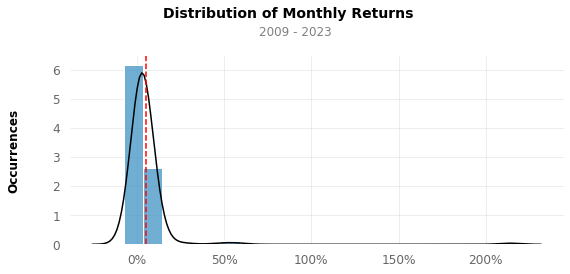

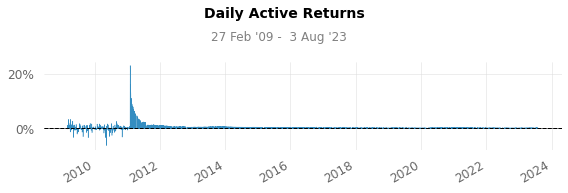

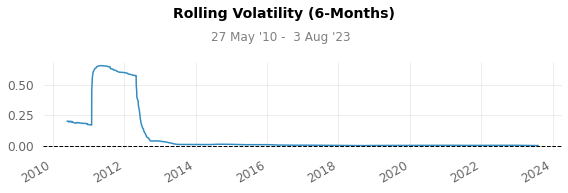

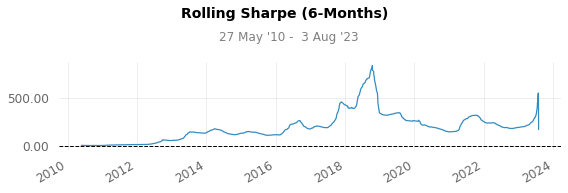

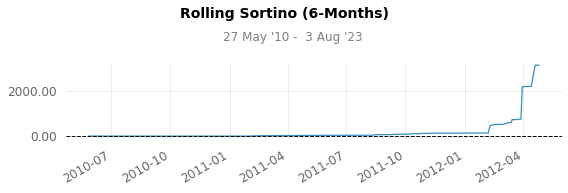

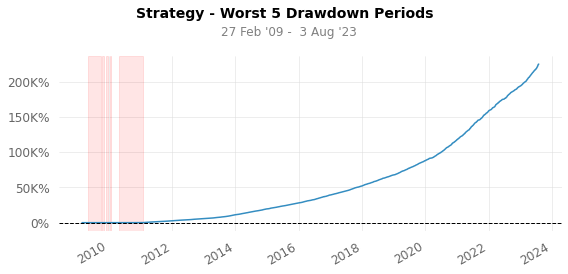

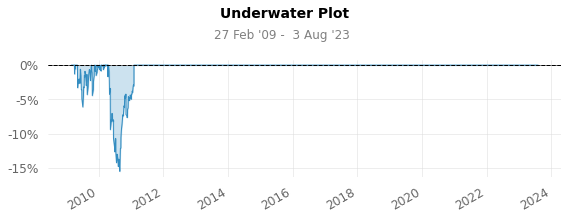

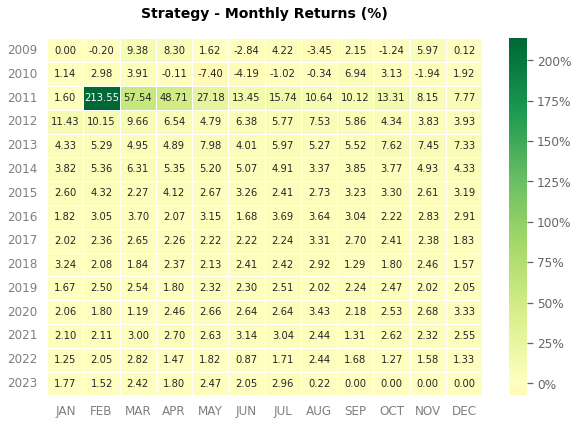

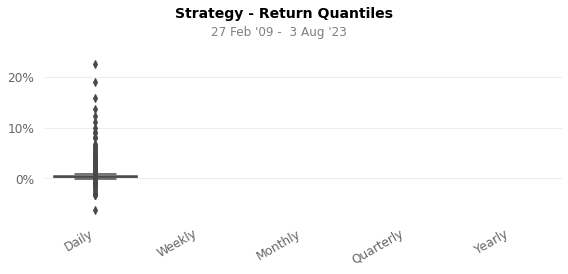

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"series\",\"df\",\"pd\",\"df\",\"qs\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

#Convert dataframe to a series
series = pd.Series(df.returnPerc, index=df.index)
# reset the index to ensure each row has a unique index
df = df.reset_index(drop=True)

#calc the quantstats report
qs.extend_pandas()
qs.reports.full(series)

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"qs\",\"series\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

qs.reports.html(series,title='ES Long Only')